<a href="https://colab.research.google.com/github/harim4422/tensorflow2_deeplearning/blob/master/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uciml/mushroom-classification

  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 55.7MB/s]


In [3]:
!unzip mushroom-classification.zip

Archive:  mushroom-classification.zip
  inflating: mushrooms.csv           


In [4]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

TensorFlow 2.x selected.


In [5]:
import pandas as pd
mushrooms = pd.read_csv('mushrooms.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in mushrooms.columns:
    mushrooms[col] = labelencoder.fit_transform(mushrooms[col])
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [0]:
y = mushrooms['class'].values
x = mushrooms.drop(['class'], axis=1)
x = x.values

In [8]:
print(x)

[[5 2 4 ... 2 3 5]
 [5 2 9 ... 3 2 1]
 [0 2 8 ... 3 2 3]
 ...
 [2 2 4 ... 0 1 2]
 [3 3 4 ... 7 4 2]
 [5 2 4 ... 4 1 2]]


In [9]:
x = (x - x.min()) / (x.max() - x.min())
print(x)

[[0.45454545 0.18181818 0.36363636 ... 0.18181818 0.27272727 0.45454545]
 [0.45454545 0.18181818 0.81818182 ... 0.27272727 0.18181818 0.09090909]
 [0.         0.18181818 0.72727273 ... 0.27272727 0.18181818 0.27272727]
 ...
 [0.18181818 0.18181818 0.36363636 ... 0.         0.09090909 0.18181818]
 [0.27272727 0.27272727 0.36363636 ... 0.63636364 0.36363636 0.18181818]
 [0.45454545 0.18181818 0.36363636 ... 0.36363636 0.09090909 0.18181818]]


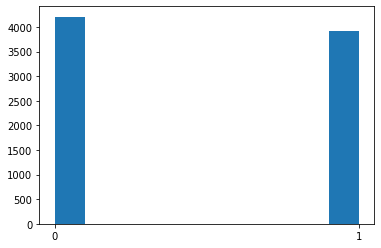

In [10]:
plt.hist(y)
plt.xticks([0, 1])
plt.show()

In [0]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.2,random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [12]:
print(x_train.shape, y_train.shape)
print(x_train)
print(y_train)

(6499, 22) (6499, 2)
[[0.27272727 0.18181818 0.18181818 ... 0.63636364 0.36363636 0.        ]
 [0.45454545 0.18181818 0.36363636 ... 0.63636364 0.36363636 0.36363636]
 [0.18181818 0.27272727 0.18181818 ... 0.63636364 0.36363636 0.18181818]
 ...
 [0.18181818 0.27272727 0.36363636 ... 0.27272727 0.45454545 0.36363636]
 [0.27272727 0.18181818 0.18181818 ... 0.63636364 0.36363636 0.36363636]
 [0.27272727 0.         0.27272727 ... 0.63636364 0.18181818 0.09090909]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


In [20]:
print(x_train[0])
print(y_train[0])
print(type(x_train))
print(type(y_train))

[0.27272727 0.18181818 0.18181818 0.         0.63636364 0.09090909
 0.         0.09090909 0.         0.09090909 0.         0.18181818
 0.09090909 0.54545455 0.63636364 0.         0.18181818 0.09090909
 0.         0.63636364 0.36363636 0.        ]
[0. 1.]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units=48, activation='relu', input_shape=(22,)),
                             tf.keras.layers.Dense(units=24, activation='relu'),
                             tf.keras.layers.Dense(units=12, activation='relu'),
                             tf.keras.layers.Dense(units=2, activation='sigmoid')
])

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07),
              loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 48)                1104      
_________________________________________________________________
dense_13 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_14 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 26        
Total params: 2,606
Trainable params: 2,606
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_split=0.25, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Train on 4874 samples, validate on 1625 samples
Epoch 1/25
4874/4874 [==============================] - 1s 219us/sample - loss: 0.3470 - accuracy: 0.8540 - val_loss: 0.2182 - val_accuracy: 0.9117
Epoch 2/25
4874/4874 [==============================] - 1s 107us/sample - loss: 0.1751 - accuracy: 0.9371 - val_loss: 0.1690 - val_accuracy: 0.9354
Epoch 3/25
4874/4874 [==============================] - 1s 112us/sample - loss: 0.1428 - accuracy: 0.9501 - val_loss: 0.1010 - val_accuracy: 0.9643
Epoch 4/25
4874/4874 [==============================] - 1s 109us/sample - loss: 0.1036 - accuracy: 0.9645 - val_loss: 0.0761 - val_accuracy: 0.9760
Epoch 5/25
4874/4874 [==============================] - 1s 111us/sample - loss: 0.0883 - accuracy: 0.9750 - val_loss: 0.0645 - val_accuracy: 0.9834
Epoch 6/25
4874/4874 [==============================] - 1s 110us/sample - loss: 0.0835 - accuracy: 0.9733 - val_loss: 0.0623 - val_accuracy: 0.9889
Epoch 7/25
4874/4874 [==============================] - 1s 113us

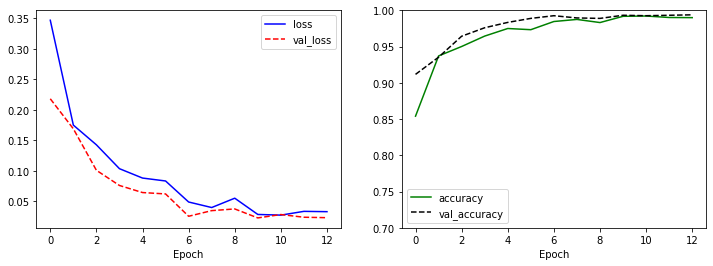

In [30]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [31]:
model.evaluate(x_test, y_test)

1625/1625 [==============================] - 0s 67us/sample - loss: 0.0256 - accuracy: 0.9932


[0.025625872203936945, 0.99323076]

In [35]:
print(x_test[0])
print(y_test[0])
print(x_test[0].shape)

[0.18181818 0.         0.36363636 0.         0.45454545 0.09090909
 0.09090909 0.         0.27272727 0.09090909 0.27272727 0.18181818
 0.         0.63636364 0.63636364 0.         0.18181818 0.09090909
 0.         0.27272727 0.27272727 0.09090909]
[1. 0.]
(22,)


In [37]:
print(model.predict(x_test[0:1]))


[[1.0000000e+00 3.6724572e-08]]
